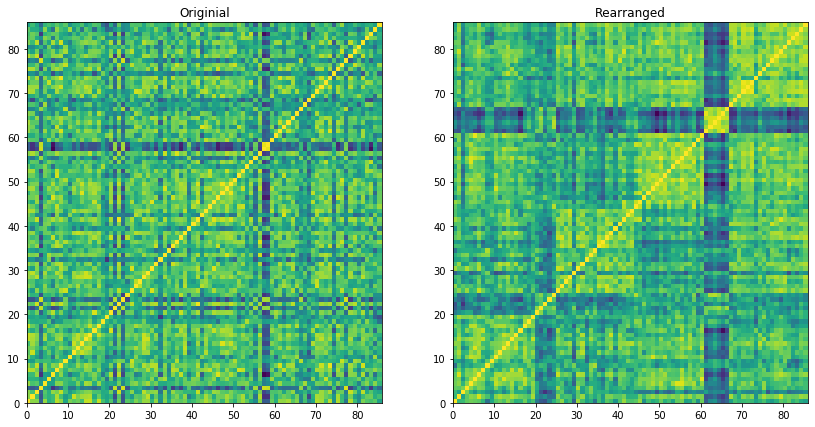

In [2]:
# 4.1.5
"""Let's draw the clusters as groups that we just
discovered in our whisky DataFrame.
Let's also rename the indices to match the sorting."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering

whisky = pd.read_csv('../whiskies.txt')
# whisky
flavors = whisky.iloc[:, 2:14]
#flavors
corr_whisky = pd.DataFrame.corr( flavors.transpose() )
model = SpectralCoclustering(n_clusters = 6, random_state=0)
model.fit( corr_whisky )
# np.sum(model.rows_, axis=1)
# np.sum(model.rows_, axis=0)

whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
# .𝑖𝑥  has been deprecated in the latest Pandas version. You might want to use .𝑖𝑙𝑜𝑐 instead. 
# whisky = whisky.ix[np.argsort(model.row_labels_)]  #warning
whisky = whisky.iloc[np.argsort(model.row_labels_)]

whisky = whisky.reset_index(drop = True)
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

plt.figure(figsize = (14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Originial")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis('tight')
# plt.savefig("correlations.pdf")
plt.show()


In [ ]:

print("We asked the spectral co-clustering method \
to identify six different groups of whiskies. \
Looking at the image on the right, \
if you follow the diagonal line on the right from the bottom-left corner \
to the top-right corner, you'll be able to see visually \
those six blocks of whiskies. \
Based on this, we would expect whiskies that \
belong to the same block to be similar in their flavor \
in terms of their smokiness, in terms of their honey flavor, and so on.")